In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
olympics = pd.read_csv(r'C:\Users\KDT-37\Desktop\KDT_7\07.numpy\athlete_events.csv')
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
print(olympics.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [4]:
olympics['Medal'] = olympics['Medal'].fillna('DNW')

In [5]:
print(olympics.isnull().sum())

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64


In [6]:
print(olympics.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head())

NOC
FRA    160
USA     97
GBR     96
SWE     52
NOR     46
Name: count, dtype: int64


In [7]:
noc_country = pd.read_csv(r'C:\Users\KDT-37\Desktop\KDT_7\07.numpy\noc_regions.csv')
noc_country.drop('notes', axis = 1 , inplace = True)
noc_country.rename(columns = {'region':'Country'}, inplace = True)

noc_country.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [8]:
olympics_merge = olympics.merge(noc_country,
                                left_on = 'NOC',
                                right_on = 'NOC',
                                how = 'left')

In [9]:
olympics_merge.loc[olympics_merge['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


In [10]:
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='SGP', 'Singapore', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='ROT', 'Refugee Olympic Athletes', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='UNK', 'Unknown', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='TUV', 'Tuvalu', olympics_merge['Country'])

In [11]:
olympics_merge.drop('Team', axis = 1, inplace = True)
olympics_merge.rename(columns = {'Country': 'Team'}, inplace = True)

In [12]:
olympics_merge

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,DNW,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",DNW,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",DNW,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,DNW,Poland


In [13]:
w_gdp = pd.read_csv(r'C:\Users\KDT-37\Desktop\KDT_7\07.numpy\w_gdp.csv', skiprows = 3)

# Remove unnecessary columns
w_gdp.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)

# The columns are the years for which the GDP has been recorded. This needs to brought into a single column for efficient
# merging.
w_gdp = pd.melt(w_gdp, id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'GDP')

# convert the year column to numeric
w_gdp['Year'] = pd.to_numeric(w_gdp['Year'])

w_gdp.head()

,Country Name,Country Code,Year,GDP
0,Aruba,ABW,1960,NaN
1,Afghanistan,AFG,1960,537777811.0
2,Angola,AGO,1960,NaN
3,Albania,ALB,1960,NaN
4,Andorra,AND,1960,NaN


In [14]:
w_gdp.isna().sum()

Country Name       0
Country Code       0
Year               0
GDP             3805
dtype: int64

In [15]:
olympics_merge_ccode = olympics_merge.merge(w_gdp[['Country Name', 'Country Code']].drop_duplicates(),
                                            left_on = 'Team',
                                            right_on = 'Country Name',
                                            how = 'left')

olympics_merge_ccode.drop('Country Name', axis = 1, inplace = True)

# Merge to get gdp too
olympics_merge_gdp = olympics_merge_ccode.merge(w_gdp,
                                                left_on = ['Country Code', 'Year'],
                                                right_on = ['Country Code', 'Year'],
                                                how = 'left')

olympics_merge_gdp.drop('Country Name', axis = 1, inplace = True)

In [16]:
olympics_merge_gdp

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,CHN,4.269157e+11
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,CHN,8.560547e+12
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,DNK,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,DNK,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NLD,2.585678e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,DNW,Poland,POL,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",DNW,Poland,POL,5.450759e+11
271113,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",DNW,Poland,POL,5.450759e+11
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,DNW,Poland,POL,1.743883e+11


In [17]:
olympics_merge_gdp.isna().sum()

ID                   0
Name                 0
Sex                  0
Age               9474
Height           60171
Weight           62875
NOC                  0
Games                0
Year                 0
Season               0
City                 0
Sport                0
Event                0
Medal                0
Team                 0
Country Code     56427
GDP             122678
dtype: int64

In [18]:
pop = pd.read_csv(r'C:\Users\KDT-37\Desktop\KDT_7\07.numpy\WorldPopulation.csv', on_bad_lines='skip')

# 'Unnamed'로 시작하는 열 제거
pop = pop.loc[:, ~pop.columns.str.contains('^Unnamed')]


In [19]:

pop.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)

pop = pd.melt(pop, id_vars = ['Country', 'Country Code'], var_name = 'Year', value_name = 'Population')

pop['Year'] = pd.to_numeric(pop['Year'])

pop.head()

,Country,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0


In [20]:
olympics_complete = olympics_merge_gdp.merge(pop,
                                            left_on = ['Country Code', 'Year'],
                                            right_on= ['Country Code', 'Year'],
                                            how = 'left')

olympics_complete.drop('Country', axis = 1, inplace = True)

olympics_complete.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP,Population
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,CHN,4.269157e+11,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,CHN,8.560547e+12,1.350695e+09
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,DNK,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,DNK,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NLD,2.585678e+11,1.476009e+07


In [21]:
olympics_complete.isnull().sum()

ID                   0
Name                 0
Sex                  0
Age               9474
Height           60171
Weight           62875
NOC                  0
Games                0
Year                 0
Season               0
City                 0
Sport                0
Event                0
Medal                0
Team                 0
Country Code     56427
GDP             122678
Population      106827
dtype: int64

In [22]:
Main_DF = olympics_complete.loc[(olympics_complete['Year'] > 1960) & (olympics_complete['Season'] == "Summer"), :]

Main_DF = Main_DF.reset_index()

In [23]:
Main_DF.isnull().sum()

index               0
ID                  0
Name                0
Sex                 0
Age               827
Height           7030
Weight           7294
NOC                 0
Games               0
Year                0
Season              0
City                0
Sport               0
Event               0
Medal               0
Team                0
Country Code    32742
GDP             45128
Population      33902
dtype: int64

In [24]:
Main_DF['Medal_Won'] = np.where(Main_DF.loc[:,'Medal'] == 'DNW', 0, 1)

In [25]:
identify_team_events = pd.pivot_table(Main_DF,
                                      index = ['Team', 'Year', 'Event'],
                                      columns = 'Medal',
                                      values = 'Medal_Won',
                                      aggfunc = 'sum',
                                     fill_value = 0).drop('DNW', axis = 1).reset_index()

identify_team_events = identify_team_events.loc[identify_team_events['Gold'] > 1, :]

team_sports = identify_team_events['Event'].unique()

team_sports

array(["Basketball Men's Basketball", "Football Men's Football",
       "Cycling Men's Madison", "Hockey Men's Hockey",
       'Sailing Mixed Multihull', 'Sailing Mixed 5.5 metres',
       'Sailing Mixed Three Person Keelboat',
       'Sailing Mixed Two Person Keelboat',
       "Swimming Men's 4 x 100 metres Medley Relay",
       "Cycling Men's Team Pursuit, 4,000 metres",
       "Hockey Women's Hockey",
       'Equestrianism Mixed Three-Day Event, Team',
       "Rowing Men's Coxless Fours", "Rowing Men's Double Sculls",
       "Rowing Women's Coxless Pairs", "Tennis Men's Doubles",
       "Beach Volleyball Women's Beach Volleyball",
       "Sailing Men's Two Person Dinghy",
       "Sailing Women's Two Person Dinghy",
       "Swimming Men's 4 x 100 metres Freestyle Relay",
       "Swimming Men's 4 x 200 metres Freestyle Relay",
       "Water Polo Women's Water Polo", "Rowing Men's Coxless Pairs",
       "Swimming Women's 4 x 100 metres Freestyle Relay",
       "Swimming Women's 4 x 100

In [26]:
remove_sports = ["Gymnastics Women's Balance Beam", "Gymnastics Men's Horizontal Bar", 
                 "Swimming Women's 100 metres Freestyle", "Swimming Men's 50 metres Freestyle"]

team_sports = list(set(team_sports) - set(remove_sports))

In [27]:
team_event_mask = Main_DF['Event'].map(lambda x: x in team_sports)
single_event_mask = [not i for i in team_event_mask]


medal_mask = Main_DF['Medal_Won'] == 1

Main_DF['Team_Event'] = np.where(team_event_mask & medal_mask, 1, 0)


Main_DF['Single_Event'] = np.where(single_event_mask & medal_mask, 1, 0)


Main_DF['Event_Category'] = Main_DF['Single_Event'] + \
Main_DF['Team_Event']

C:\Users\KDT-37\AppData\Local\Temp\ipykernel_13060\2091496342.py:10: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  Main_DF['Single_Event'] = np.where(single_event_mask & medal_mask, 1, 0)


In [28]:
medal_df = Main_DF.\
groupby(['Year', 'Team', 'Event', 'Medal'])[['Medal_Won', 'Event_Category']].agg('sum').reset_index()

medal_df['Medal_Won_Corrected'] = medal_df['Medal_Won']/medal_df['Event_Category']

In [29]:
# 가장 많은 메달 딴 나라 top 4개국
medal_df = medal_df.groupby(['Year','Team'])['Medal_Won_Corrected'].agg('sum').reset_index()

medal_pivot = pd.pivot_table(medal_df,
                     index = 'Team',
                     columns = 'Year',
                     values = 'Medal_Won_Corrected',
                     aggfunc = 'sum',
                     margins = True).sort_values('All', ascending = False)[1:5]

# print total medals won in the given period
medal_pivot.loc[:,'All']

Team
USA        1387.0
Russia     1298.0
Germany    1042.0
China       545.0
Name: All, dtype: float64

In [30]:
# Year와 City 열만 선택 후, 중복된 값을 제거
Main_DF[['Year', 'City']].drop_duplicates().sort_values('Year')

,Year,City
74,1964,Tokyo
11,1968,Mexico City
12,1972,Munich
37,1976,Montreal
70,1980,Moskva
10,1984,Los Angeles
13,1988,Seoul
0,1992,Barcelona
3,1996,Atlanta
2,2000,Sydney


In [31]:
# 오타 수정
Main_DF['City'] = Main_DF['City'].replace(['Athina', 'Moskva'], ['Athens', 'Moscow'])

In [32]:
# 개최국 데이처 추가
city_to_country = {'Tokyo': 'Japan',
                  'Mexico City': 'Mexico',
                  'Munich': 'Germany',
                  'Montreal': 'Canada',
                  'Moscow': 'Russia',
                  'Los Angeles': 'USA',
                  'Seoul': 'South Korea',
                  'Barcelona': 'Spain',
                  'Atlanta': 'USA',
                  'Sydney': 'Australia',
                  'Athens': 'Greece',
                  'Beijing': 'China',
                  'London': 'UK',
                  'Rio de Janeiro' : 'Brazil'}


Main_DF['Country_Host'] = Main_DF['City'].map(city_to_country)

Main_DF.loc[:, ['Year', 'Country_Host']].drop_duplicates().sort_values('Year')

,Year,Country_Host
74,1964,Japan
11,1968,Mexico
12,1972,Germany
37,1976,Canada
70,1980,Russia
10,1984,USA
13,1988,South Korea
0,1992,Spain
3,1996,USA
2,2000,Australia


In [33]:
# 국가별 참가인원 계산
year_team_gender = Main_DF.loc[:,['Year','Team', 'Name', 'Sex']].drop_duplicates()

year_team_gender_count = pd.pivot_table(year_team_gender,
                                        index = ['Year', 'Team'],
                                        columns = 'Sex',
                                        aggfunc = 'count').reset_index()


year_team_gender_count.columns = year_team_gender_count.columns.get_level_values(0)


year_team_gender_count.columns = ['Year', 'Team', 'Female_Athletes', 'Male_Athletes']
year_team_gender_count = year_team_gender_count.fillna(0)


year_team_gender_count['Total_Athletes'] = year_team_gender_count['Female_Athletes'] + \
year_team_gender_count['Male_Athletes']

year_team_count = year_team_gender_count.loc[:, ['Year', 'Team','Total_Athletes']]
year_team_count.head()

,Year,Team,Total_Athletes
0,1964,Afghanistan,8.0
1,1964,Algeria,1.0
2,1964,Argentina,102.0
3,1964,Australia,243.0
4,1964,Austria,56.0


In [34]:
year_team_gdp = Main_DF.loc[:, ['Year', 'Team', 'GDP']].drop_duplicates()

medal_gdp = medal_df.merge(year_team_gdp,
                                   left_on = ['Year', 'Team'],
                                   right_on = ['Year', 'Team'],
                                   how = 'left')

In [35]:
r = medal_gdp['Medal_Won_Corrected'] > 0
correlation = medal_gdp.loc[r, ['GDP', 'Medal_Won_Corrected']].corr()['Medal_Won_Corrected'][0]
print(correlation)

0.5267715536833151


C:\Users\KDT-37\AppData\Local\Temp\ipykernel_13060\2512689612.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  correlation = medal_gdp.loc[r, ['GDP', 'Medal_Won_Corrected']].corr()['Medal_Won_Corrected'][0]


In [36]:
medal_gdp.head()

,Year,Team,Medal_Won_Corrected,GDP
0,1964,Afghanistan,0.0,8.000000e+08
1,1964,Algeria,0.0,2.909352e+09
2,1964,Argentina,1.0,2.560525e+10
3,1964,Australia,18.0,2.378766e+10
4,1964,Austria,0.0,9.169984e+09


In [37]:
year_team_pop = Main_DF.loc[:, ['Year', 'Team', 'Population']].drop_duplicates()
year_team_pop.head()

,Year,Team,Population
0,1992,China,1.164970e+09
1,2012,China,1.350695e+09
2,2000,Finland,5.176209e+06
3,1996,Finland,5.124573e+06
6,2008,Norway,4.768212e+06


In [38]:
medal_gdp_population = medal_gdp.merge(year_team_pop,
                                            left_on = ['Year', 'Team'],
                                            right_on = ['Year', 'Team'],
                                            how = 'left')

medal_gdp_pop_TA = medal_gdp_population.merge(year_team_count,
                                                     left_on = ['Year', 'Team'],
                                                     right_on = ['Year', 'Team'],
                                                     how = 'left')
medal_gdp_pop_TA.head()

,Year,Team,Medal_Won_Corrected,GDP,Population,Total_Athletes
0,1964,Afghanistan,0.0,8.000000e+08,9731361.0,8.0
1,1964,Algeria,0.0,2.909352e+09,12295970.0,1.0
2,1964,Argentina,1.0,2.560525e+10,21953929.0,102.0
3,1964,Australia,18.0,2.378766e+10,11167000.0,243.0
4,1964,Austria,0.0,9.169984e+09,7223801.0,56.0


In [39]:
year_host = Main_DF.loc[:, ['Year', 'Country_Host']].drop_duplicates()

Analytical_data = medal_gdp_pop_TA.merge(year_host,
                              left_on = 'Year',
                              right_on = 'Year',
                              how = 'left')

Analytical_data.head()

,Year,Team,Medal_Won_Corrected,GDP,Population,Total_Athletes,Country_Host
0,1964,Afghanistan,0.0,8.000000e+08,9731361.0,8.0,Japan
1,1964,Algeria,0.0,2.909352e+09,12295970.0,1.0,Japan
2,1964,Argentina,1.0,2.560525e+10,21953929.0,102.0,Japan
3,1964,Australia,18.0,2.378766e+10,11167000.0,243.0,Japan
4,1964,Austria,0.0,9.169984e+09,7223801.0,56.0,Japan


In [40]:
import statsmodels.api as sm
from patsy import dmatrices
from sklearn import metrics

In [41]:
# 독립변수
# 문자형 데이터 -> 범주형 데이터로 변환
Analytical_data['Home_adv'] = np.where(Analytical_data['Country_Host'] == Analytical_data['Team'], 1, 0)

In [42]:
# 결측치 확인
Analytical_data.isna().sum()

Year                     0
Team                     0
Medal_Won_Corrected      0
GDP                    511
Population             346
Total_Athletes           0
Country_Host             0
Home_adv                 0
dtype: int64

In [76]:
# 결측치 처리
Analytical_data.dropna(how = 'any', inplace = True)

In [77]:
# 결측치 확인
Analytical_data.isna().sum()

Year                   0
Team                   0
Medal_Won_Corrected    0
GDP                    0
Population             0
Total_Athletes         0
Country_Host           0
Home_adv               0
Log_GDP                0
Log_Population         0
dtype: int64

Text(0.5, 1.0, '국가별 인구 분포')

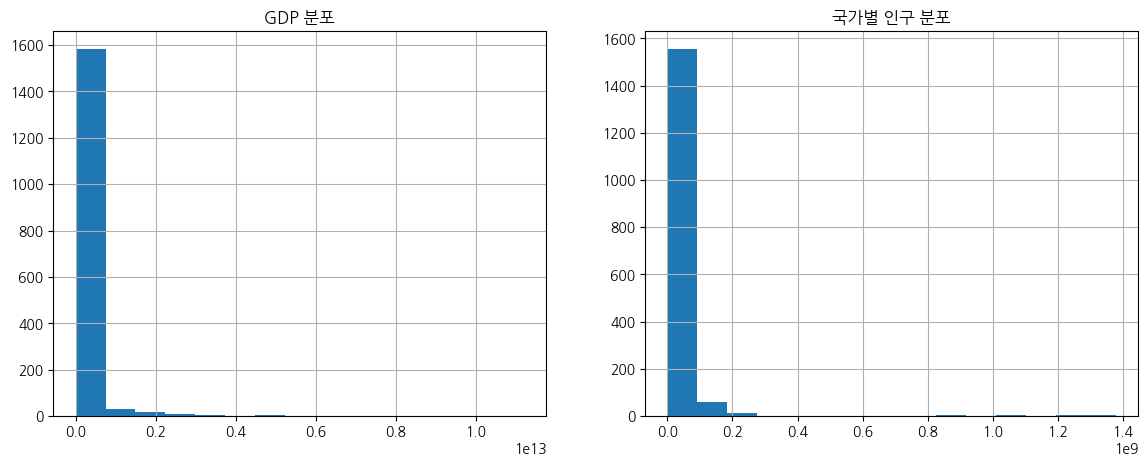

In [78]:
# 독립변수( population 과 GDP) 분포 확인 -> 히스토그램

fig, (ax1, ax2) = plt.subplots(nrows = 1,
                          ncols = 2,
                          figsize = (14,5))

Analytical_data['GDP'].hist(bins = 15, ax = ax1)
ax1.set_title('GDP 분포')

Analytical_data['Population'].hist(bins = 15, ax = ax2)
ax2.set_title('국가별 인구 분포')

In [44]:
# 한쪽으로 치우져있는 그래프 -> log변환 수행
# 이유 : 선형모델에 맞도록 정규화를 시켜야 정확한 예측 가능

In [79]:
import math

# log변환
Analytical_data['Log_GDP'] = np.log(Analytical_data['GDP'])
Analytical_data['Log_Population'] = np.log(Analytical_data['Population'])

Text(0.5, 1.0, '국가별 인구 분포(Log_Population)')

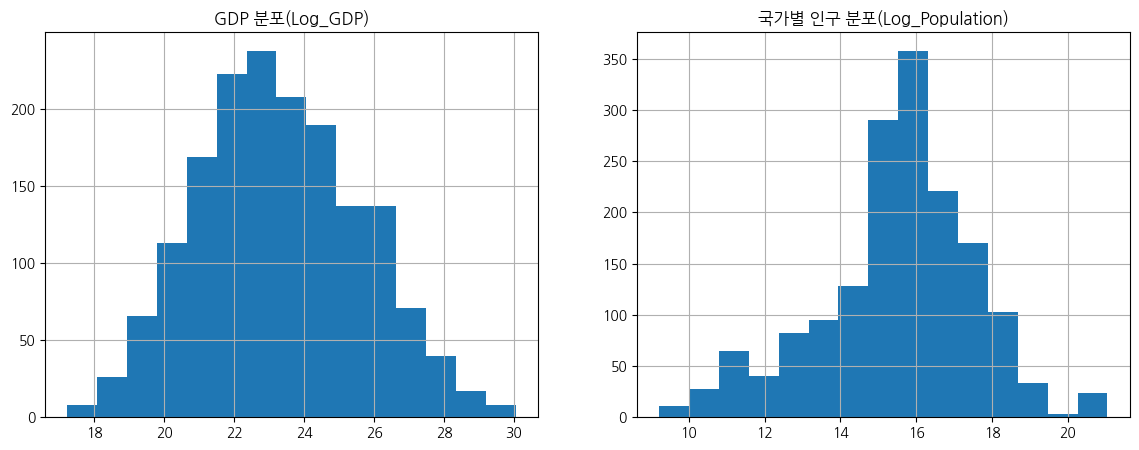

In [80]:
# 다시한번 그래프를 그려 이전에 그렸던 그래프와 비교
# 변환한 데이터가 정규분포에 조금이라도 같아졌는지 확인
fig, (ax1, ax2) = plt.subplots(nrows = 1,
                          ncols = 2,
                          figsize = (14,5))

Analytical_data['Log_GDP'].hist(bins = 15, ax = ax1)
ax1.set_title('GDP 분포(Log_GDP)')

Analytical_data['Log_Population'].hist(bins = 15, ax = ax2)
ax2.set_title('국가별 인구 분포(Log_Population)')

In [81]:
# OLS분석 
y, X = dmatrices('Medal_Won_Corrected ~ Log_GDP + Log_Population + Total_Athletes + Home_adv', 
                data = Analytical_data,
                return_type = 'dataframe')

model = sm.OLS(y, X)
ols_results = model.fit()

ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Medal_Won_Corrected   R-squared:                       0.743
Model:                             OLS   Adj. R-squared:                  0.742
Method:                  Least Squares   F-statistic:                     1190.
Date:                 Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                         04:57:41   Log-Likelihood:                -5139.1
No. Observations:                 1651   AIC:                         1.029e+04
Df Residuals:                     1646   BIC:                         1.032e+04
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.5302      1.724      7.269      0.000       9.149      15.911
Log_GDP           -0.8136      0.098     -8.319      0.000      -1.005      -0.622
Log_Population     0.2566      0.092      2.785      0.005       0.076       0.437
Total_Athletes     0.1225      0.002     54.993      0.000       0.118       0.127
Home_adv         -12.3798      1.991     -6.218      0.000     -16.285      -8.475
==============================================================================
Omnibus:                     1956.864   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           482838.086
Skew:                           5.746   Prob(JB):                         0.00
Kurtosis:                      85.986   Cond. No.                     1.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
# 회귀 계수 출력
intercept = ols_results.params.iloc[0]  # 절편
coeff_X1 = ols_results.params.iloc[1]   # X1에 대한 회귀 계수
coeff_X2 = ols_results.params.iloc[2]   # X2에 대한 회귀 계수
coeff_X3 = ols_results.params.iloc[3]   # X3에 대한 회귀 계수
coeff_X4 = ols_results.params.iloc[4]   # X4에 대한 회귀 계수

# 회귀식 출력 (여러 줄로 나누기)
print(f'회귀식: Y = {intercept:.2f} + ({coeff_X1:.2f} * X1) + ({coeff_X2:.2f} * X2) \
+ ({coeff_X3:.2f} * X3) + ({coeff_X4:.2f} * X4)')


회귀식: Y = 12.53 + (-0.81 * X1) + (0.26 * X2) + (0.12 * X3) + (-12.38 * X4)


In [83]:
# 변수 값 (예시)
gdp =  3000000000 # GDP
population =  51207000 # 인구수
athletes = 144  # 참가 인원
host_country = 0  # 개최국 여부

# 회귀식 계산
predicted_medals = 	12.5302 + (-0.8136 * gdp) + (0.2566 * population) + (0.1225 * athletes) + (-12.3798 * host_country)

# 예측된 메달 갯수 출력
print(f'2024년 파리 올림픽 대한민국 메달 갯수 예측: {predicted_medals:.2f}')

2024년 파리 올림픽 대한민국 메달 갯수 예측: -2427660253.63


In [84]:
print(Analytical_data['Medal_Won_Corrected'].mean())
print(Analytical_data['Medal_Won_Corrected'].var())

3.817686250757117
115.26916579483135


In [85]:
# 2.  Negative Binomial 회귀
# 분산이 평균보다 클 때(과대산포일때)사용
# mean:3.82 < var: 115.27

X = Analytical_data[['Log_GDP', 'Total_Athletes', 'Log_Population', 'Home_adv' ]]
X = sm.add_constant(X)  # 절편 추가
y = Analytical_data['Medal_Won_Corrected']

nb_model = sm.NegativeBinomial(y, X)
nb_results = nb_model.fit()
print(nb_results.summary())

Optimization terminated successfully.
         Current function value: 1.527503
         Iterations: 34
         Function evaluations: 40
         Gradient evaluations: 38
                      NegativeBinomial Regression Results                      
Dep. Variable:     Medal_Won_Corrected   No. Observations:                 1651
Model:                NegativeBinomial   Df Residuals:                     1646
Method:                            MLE   Df Model:                            4
Date:                 Sun, 02 Mar 2025   Pseudo R-squ.:                  0.1935
Time:                         04:57:54   Log-Likelihood:                -2521.9
converged:                        True   LL-Null:                       -3127.1
Covariance Type:             nonrobust   LLR p-value:                8.518e-261
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -7.4

c:\Users\KDT-37\anaconda3\envs\bigdata\Lib\site-packages\statsmodels\discrete\discrete_model.py:3470: RuntimeWarning: overflow encountered in multiply
  dparams = exog*a1 * (y-mu)/(mu+a1)


In [86]:
## 모델 적합도 확인 -> AIC값이 낮을수록 모델이 더 적합함

print("OLS AIC:", ols_results.aic)
print("Negative Binomial AIC:", nb_results.aic)

if ols_results.aic < nb_results.aic:
    print("OLS 모델이 더 적합합니다.")
else:
    print("Negative Binomial 모델이 더 적합합니다.")

OLS AIC: 10288.145649376065
Negative Binomial AIC: 5055.815507120651
Negative Binomial 모델이 더 적합합니다.


In [87]:
y_predicted = ols_results.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_predicted))

13.485535877982173

In [89]:
y_predicted = nb_results.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_predicted))

251.93325334830791